<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos_2022/blob/main/OLS_3_Transformaciones_Dummies_RegMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_author: Ricardo Pasquini (rpasquini@gmail.com)

En este notebook realizaremos un diagnostico grafico de los supuestos estadisticos sobre el error, evaluaremos la transformación de la variable a explicar (transformación logarítmica), y exploraremos los efectos de la inclusión de variables explicativas adicionales al modelo de tipo categóricas. 

# Instalacion e Importacion de Librerias



In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install contextily


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import contextily as cx

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [5]:
departamentos.head()

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 1819-CRI180 ubicado en: Av. Callao 180...,None,2019-10-10,0,Argentina,...,18000,Mensual,NaN,2019-09-26,52,58,Recoleta. Av. Callao y Av. Alvear. Piso alto. ...,Departamento,Departamento,POINT (106827.294 104558.628)
1,3.0,NaN,Argentina,2019-09-26,ARS,Residencia de estudiantes y viajeros. Son dos ...,None,2019-11-04,1,Argentina,...,45000,Mensual,NaN,2019-09-26,219,219,Departamento - Balvanera,Departamento,Departamento,POINT (106347.880 102524.692)
2,1.0,2.0,Argentina,2019-09-26,ARS,CODIGO: 1348-AF021227 ubicado en: Tacuari 263 ...,None,2019-09-28,2,Argentina,...,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
3,NaN,NaN,Argentina,2019-09-26,ARS,Departamento de dos ambientes a 200 metros de ...,None,2020-02-12,4,Argentina,...,11000,Mensual,NaN,2019-09-26,38,38,Departamento - San Justo,Departamento,Departamento,POINT (91709.240 94331.755)
4,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 733-1600MARIANOA ubicado en: MARIANO A...,None,2019-11-10,5,Argentina,...,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)


# OLS

Modelo:

$price_i=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [7]:
def regress(listadevars, dataframe):
  """ 
  Funcion que realiza la regresion OLS
  listadevars es una lista de nombres de variables, comenzando por la dependiente, y el resto son las explicativas
  dataframe es la base de datos
  """
  datos=dataframe[listadevars]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[listadevars[0]]
  X=datos[listadevars[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

In [9]:
regress(['price', 'bedrooms'],departamentos)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          7.68e-308
Time:                        00:08:12   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
resultsreg=regress(['price', 'bedrooms'],departamentos) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):          7.68e-308
Time:                        00:18:29   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Diagnóstico de Errores
## Histrograma de Errores Estimados


Predicción: \\

$\hat{price_i}=\hat{\beta_0}+\hat{\beta_1}*bedrooms_i$

In [11]:
datos=departamentos[['price', 'bedrooms']].dropna()
prediccion=1.151e+04+4253.5067*datos.bedrooms
prediccion

0        15763.5067
2        20017.0134
4        15763.5067
43       15763.5067
45       15763.5067
            ...    
50647    20017.0134
50648    15763.5067
50650    28524.0268
50651    15763.5067
50652    20017.0134
Name: bedrooms, Length: 27879, dtype: float64

In [13]:
1.151e+04+4253.5067*datos.bedrooms

0        15763.5067
2        20017.0134
4        15763.5067
43       15763.5067
45       15763.5067
            ...    
50647    20017.0134
50648    15763.5067
50650    28524.0268
50651    15763.5067
50652    20017.0134
Name: bedrooms, Length: 27879, dtype: float64

In [16]:
#notar que la prediccion también se puede obtener a través de un método específico
resultsreg.predict()

array([15759.69772791, 20013.20447292, 15759.69772791, ...,
       28520.21796295, 15759.69772791, 20013.20447292])

Errores estimados \\
$\hat{\epsilon_i}=price_i-\hat{price_i}$

In [17]:
residuos=datos.price-prediccion
residuos

0         2236.4933
2        -1517.0134
4         2736.4933
43        -763.5067
45       -2763.5067
            ...    
50647    -9517.0134
50648     1736.4933
50650    11475.9732
50651   -11263.5067
50652    -7017.0134
Length: 27879, dtype: float64

Revisamos la distribución en un histograma


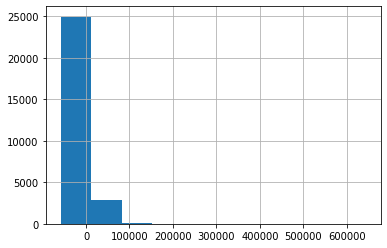

In [18]:
residuos.hist()

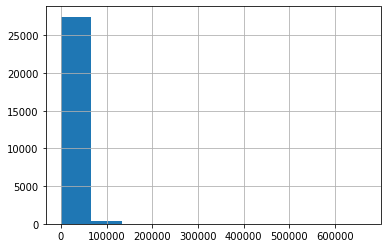

In [19]:
datos.price.hist()

#Transformación Logarítmica

Modelo propuesto:

$log(price_i)=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [22]:
datos['logprice']=np.log(datos.price)

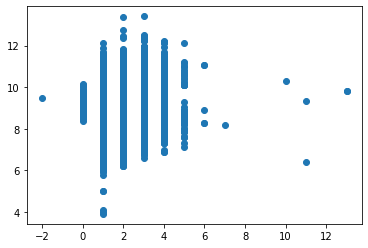

In [26]:
plt.scatter(datos.bedrooms, datos.logprice)

In [20]:
np.log(datos.price)

0         9.798127
2         9.825526
4         9.825526
43        9.615805
45        9.472705
           ...    
50647     9.259131
50648     9.769956
50650    10.596635
50651     8.411833
50652     9.472705
Name: price, Length: 27879, dtype: float64

np numpy \\
np.log()

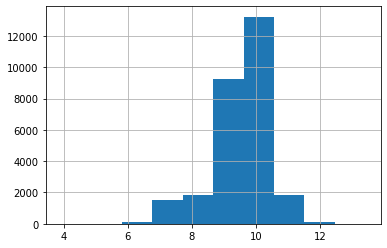

In [27]:
datos['logprice'].hist()

In [28]:
resultados=regress(['logprice', 'bedrooms'],datos) 

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     19.53
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           9.96e-06
Time:                        00:33:36   Log-Likelihood:                -35268.
No. Observations:               27879   AIC:                         7.054e+04
Df Residuals:                   27877   BIC:                         7.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4810      0.011    841.888      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


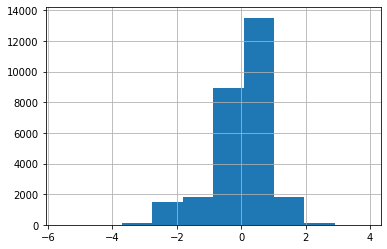

In [29]:
residuos2=datos['logprice']-resultados.predict()
residuos2.hist()

También podríamos revisar el comportamiento de la variabilidad del error con respecto a una variable explicativa (cumplimiento del supuesto de homocedasticidad)

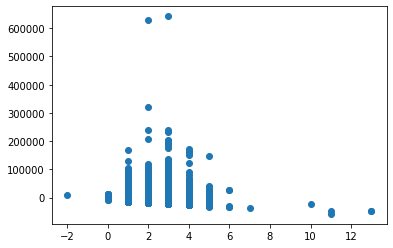

In [34]:
plt.scatter(datos.bedrooms,residuos)

Si los datos tuvieran un orden temporal (caso series de tiempo) podríamos analizar si la serie tiene algun tipo de correlación temporal simplemente graficando a los residuos, en orden, y examinando si hay algun tipo de permanencia en la tendencia resultante.

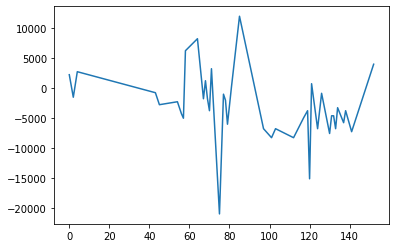

In [32]:
# Ploteamos los primeros 40 residuos
plt.plot(residuos[0:40])

Una alternativa es mirar, en un scatter plot, si hay alguna correlación entre la serie de residuos, y la misma serie pero con un rezago temporal (es decir, comparo cada observacion con su inmediata anterior). La intuicion es que si en la serie tiene algun tipo de correlacion temporal (a valores altos le siguen valores altos) al realizar el ploteo cruzado voy a tener una relación positiva.

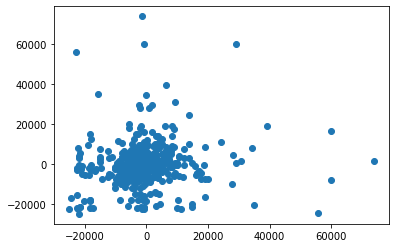

In [36]:
plt.scatter(residuos[0:500],residuos[1:501])

Para analizar la presencia de correlación espacial, quisieramos ver si la cercania espacial entre las observaciones implica que los residuos se comporten de una manera similar (valores de residuos altos tiene cercanos a otros valores altos, etc.). Podemos plotear los residuos en el espacio utilizando las posibilidades de la libreria geopandas. Recordemos que departamentos es un dataframe de geopandas, por lo que tiene las coordenadas espaciales asociadas. El método plot permitía plotear los datos en el espacio. 

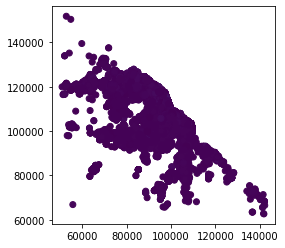

In [34]:
# Si especificamos que plotee "price", entonces el grafico le dará mayor intensidad de color a los precios más altos.
# En este caso no se observa variacion de color  por la presencia de outliers.
departamentos.plot('price')

El siguiente ejemplo muestra como en pocas lineas de codigo es posible agregar al ploteo espacial un mapa de base (usando la libreria contextily)

(-6572476.256380769,
 -6451034.427907456,
 -4160802.376179422,
 -4045391.256813092)

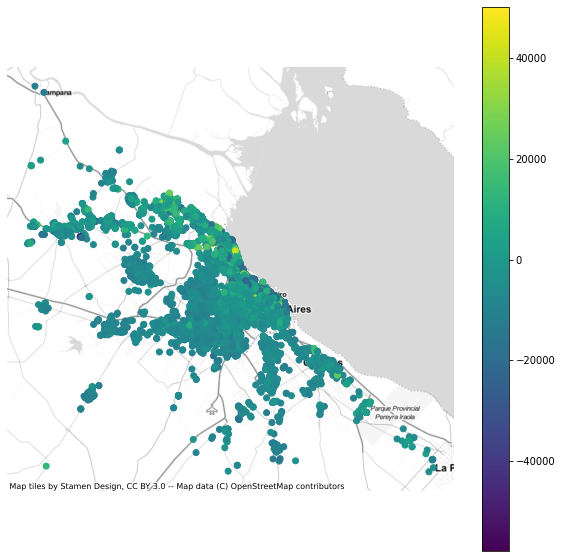

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
residuos.name='residuos'
# join agrega al dataframe de departamentos los residuos
departamentostemp=departamentos.join(residuos)
# to_crs(epsg=3857) realiza un cambio en la proyeccion espacial de los datos a la proyeccion epsg 3857. 
# Se realiza para que coincida con la proyeccion espacial del mapa de base
departamentostemp.loc[departamentostemp.residuos<50000].to_crs(epsg=3857).plot(ax=ax, column='residuos', legend=True)
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)
cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

# Variables Categóricas: Ejemplo dummy capital vs. provincia

In [27]:
departamentos.loc[departamentos.price<80000].price.hist()
departamentos=departamentos.loc[departamentos.price<80000]

In [59]:
regress(['price', 'bedrooms'],departamentos) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          7.68e-308
Time:                        20:54:48   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
departamentos['dcaba']=np.where(departamentos['l2']=='Capital Federal',1,0)

In [44]:
departamentos[['dcaba','l2']]

,dcaba,l2
0,1,Capital Federal
1,1,Capital Federal
2,1,Capital Federal
3,0,Bs.As. G.B.A. Zona Oeste
4,1,Capital Federal
...,...,...
50648,1,Capital Federal
50649,1,Capital Federal
50650,1,Capital Federal
50651,0,Bs.As. G.B.A. Zona Norte


In [61]:
regress(['price', 'bedrooms','dcaba'],departamentos) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     721.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          3.47e-306
Time:                        20:55:11   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27876   BIC:                         6.176e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.155e+04    242.534     47.615      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Creacion de variable Dummies para los barrios de CABA
Para este ejercicio solo estudiaremos los datos de CABA

In [46]:
departamentosCABA=departamentos.loc[departamentos['l2']=='Capital Federal']

In [47]:
departamentosCABA.l3.unique()

array(['Recoleta', 'Balvanera', 'Monserrat', 'Villa Urquiza', 'Almagro',
       'Palermo', 'Belgrano', 'Caballito', 'Nuñez', 'Congreso',
       'Saavedra', 'Barrio Norte', 'Puerto Madero', 'Retiro', 'Once',
       'Barracas', 'Floresta', 'Chacarita', 'Colegiales', 'Las Cañitas',
       'San Nicolás', 'Villa Crespo', 'Villa del Parque',
       'Parque Centenario', 'Villa Pueyrredón', 'Villa General Mitre',
       'Boedo', 'Flores', 'Coghlan', 'Paternal', 'San Telmo',
       'Monte Castro', 'Villa Devoto', 'San Cristobal',
       'Parque Chacabuco', 'Parque Avellaneda', 'Abasto', 'Mataderos',
       'Tribunales', 'Villa Luro', 'Villa Ortuzar',
       'Centro / Microcentro', 'Boca', 'Liniers', 'Villa Lugano',
       'Parque Chas', 'Constitución', 'Agronomía', 'Parque Patricios',
       None, 'Versalles', 'Villa Santa Rita', 'Velez Sarsfield',
       'Pompeya', 'Villa Real', 'Villa Riachuelo', 'Catalinas'],
      dtype=object)

In [48]:
# Un extra. Calculo del numero de observaciones por barrio usando groupby
departamentosCABA.groupby(by='l3').agg(['count'])['index']

,count
l3,
Abasto,163
Agronomía,37
Almagro,1406
Balvanera,698
Barracas,274
Barrio Norte,1692
Belgrano,3708
Boca,143
Boedo,295


In [49]:
## Construccion de dummies para una variable categorica de manera automatizada

In [50]:
dummiesbarrios=pd.get_dummies(departamentosCABA.l3, prefix='dum')
dummiesbarrios

,dum_Abasto,dum_Agronomía,dum_Almagro,dum_Balvanera,dum_Barracas,dum_Barrio Norte,dum_Belgrano,dum_Boca,dum_Boedo,dum_Caballito,...,dum_Villa General Mitre,dum_Villa Lugano,dum_Villa Luro,dum_Villa Ortuzar,dum_Villa Pueyrredón,dum_Villa Real,dum_Villa Riachuelo,dum_Villa Santa Rita,dum_Villa Urquiza,dum_Villa del Parque
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
departamentosCABA=pd.concat([departamentosCABA, dummiesbarrios],axis=1)

#Estimacion del Modelo con dummys

Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*DPalermo+\epsilon_i$


In [52]:
datos=departamentosCABA[['price', 'bedrooms','dum_Palermo']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['bedrooms','dum_Palermo']]
X=sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     282.1
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          1.75e-121
Time:                        20:52:38   Log-Likelihood:            -2.1589e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.305e+04    262.836     49.666      

In [54]:
Ypred=resultados.predict(X)

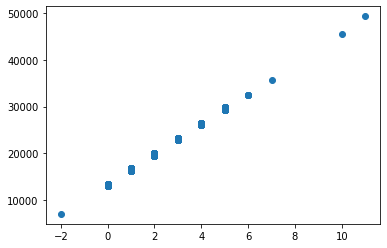

In [55]:
plt.scatter(datos.bedrooms,Ypred)

#Estimacion del Modelo Multivariado

Modelo propuesto:

$price_i=\beta_0+\beta_1*bedrooms_i+\beta_2*surface+\epsilon_i$

In [56]:
datos=departamentosCABA[['price', 'bedrooms','surface_to']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['bedrooms','surface_to']]
X=sm.add_constant(X)
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     281.5
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          3.10e-121
Time:                        20:52:38   Log-Likelihood:            -2.1590e+05
No. Observations:               19381   AIC:                         4.318e+05
Df Residuals:                   19378   BIC:                         4.318e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.313e+04    259.172     50.670      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
datos=departamentosCABA[['price', 'bedrooms','surface_to']]
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()
Y=datos.price
X=datos[['surface_to']]
X=sm.add_constant(X)
modelo=sm.OLS(Y,X)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.025
Date:                Thu, 30 Jun 2022   Prob (F-statistic):            0.00267
Time:                        20:52:38   Log-Likelihood:            -2.1617e+05
No. Observations:               19381   AIC:                         4.323e+05
Df Residuals:                   19379   BIC:                         4.324e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.845e+04    128.807    143.224      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
